In [20]:
import numpy as np
import pandas as pd
from tortreinador.utils.plot import plot_line_2
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from tortreinador.models.MDN import mdn, Mixture, NLLLoss
from tortreinador.utils.View import init_weights, split_weights
from tortreinador.utils.metrics import r2_score
import torch
import torch.nn as nn
import joblib
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib
import matplotlib.pyplot as plt
import proplot as pplt

In [2]:
df_GG = pd.read_excel('D:\\Resource\\Gas_Giants_Core_Earth20W.xlsx')
df_GG['M_total (M_E)'] = df_GG['Mcore (M_J/10^3)'] + df_GG['Menv (M_E)']

In [3]:
input_parameters = [
    'Mass (M_J)',
    'Radius (R_E)',
    'T_sur (K)',
]

output_parameters = [
    'M_total (M_E)',
    'T_int (K)',
    'P_CEB (Mbar)',
    'T_CEB (K)'
]

In [4]:
t_loader, v_loader, t_x, t_y, m_x, m_y = load_data(df_GG, input_parameters, output_parameters, batch_size=256)

In [5]:
trainer = TorchTrainer(epoch=200)

Batch size: 512, Epoch:200, is GPU: True


In [6]:
model = mdn(len(input_parameters), len(output_parameters), 20, 512)
init_weights(model)
criterion = NLLLoss()
pdf = Mixture()
optim = torch.optim.Adam(split_weights(model), lr=0.0005, weight_decay=0.001)

In [7]:
t_l, v_l, val_r2, train_r2, mse = trainer.fit_for_MDN(t_loader, v_loader, criterion, model=model, mixture=pdf, model_save_path='D:\\Resource\\MDN\\GrainExoModel\\', optim=optim, best_r2=0.8, lr_milestones=[15, 45, 60, 110, 130, 150], gamma=0.7)

module.root_layer.0.weight : torch.Size([512, 3])
module.root_layer.0.bias : torch.Size([512])
module.root_layer.2.weight : torch.Size([512, 512])
module.root_layer.2.bias : torch.Size([512])
module.root_layer.4.weight : torch.Size([512, 512])
module.root_layer.4.bias : torch.Size([512])
module.pi.0.weight : torch.Size([512, 512])
module.pi.0.bias : torch.Size([512])
module.pi.2.weight : torch.Size([20, 512])
module.pi.2.bias : torch.Size([20])
module.mu.0.weight : torch.Size([512, 512])
module.mu.0.bias : torch.Size([512])
module.mu.2.weight : torch.Size([80, 512])
module.mu.2.bias : torch.Size([80])
module.sigma.0.weight : torch.Size([512, 512])
module.sigma.0.bias : torch.Size([512])
module.sigma.2.weight : torch.Size([80, 512])
module.sigma.2.bias : torch.Size([80])


Epoch 2 Validating: 100%|██████████| 79/79 [00:02<00:00, 27.74batch/s, loss=-14.0456, loss_avg=-13.8722, mse=0.0060, r2=0.8370]


Save Best model: R2:0.8370, Loss Avg:-13.8722


Epoch 3 Validating: 100%|██████████| 79/79 [00:03<00:00, 25.42batch/s, loss=-14.7121, loss_avg=-14.7934, mse=0.0018, r2=0.8552]


Save Best model: R2:0.8552, Loss Avg:-14.7934


Epoch 5 Validating: 100%|██████████| 79/79 [00:02<00:00, 29.62batch/s, loss=-16.1516, loss_avg=-15.6762, mse=0.0014, r2=0.9158]


Save Best model: R2:0.9158, Loss Avg:-15.6762


Epoch 6 Validating: 100%|██████████| 79/79 [00:03<00:00, 25.36batch/s, loss=-16.5080, loss_avg=-16.1557, mse=0.0009, r2=0.9177]


Save Best model: R2:0.9177, Loss Avg:-16.1557


Epoch 7 Validating: 100%|██████████| 79/79 [00:02<00:00, 28.15batch/s, loss=-16.5984, loss_avg=-16.3370, mse=0.0011, r2=0.9423]


Save Best model: R2:0.9423, Loss Avg:-16.3370


Epoch 13 Validating: 100%|██████████| 79/79 [00:02<00:00, 31.25batch/s, loss=-18.0385, loss_avg=-17.6474, mse=0.0008, r2=0.9480]


Save Best model: R2:0.9480, Loss Avg:-17.6474


Epoch 15 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.67batch/s, loss=-17.6695, loss_avg=-17.5158, mse=0.0005, r2=0.9522]


Save Best model: R2:0.9522, Loss Avg:-17.5158


Epoch 16 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.70batch/s, loss=-17.8741, loss_avg=-17.7209, mse=0.0009, r2=0.9636]


Save Best model: R2:0.9636, Loss Avg:-17.7209


Epoch 18 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.95batch/s, loss=-18.5178, loss_avg=-18.0739, mse=0.0006, r2=0.9690]


Save Best model: R2:0.9690, Loss Avg:-18.0739


Epoch 23 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.76batch/s, loss=-18.7720, loss_avg=-18.6405, mse=0.0005, r2=0.9747]


Save Best model: R2:0.9747, Loss Avg:-18.6405


Epoch 26 Validating: 100%|██████████| 79/79 [00:02<00:00, 27.76batch/s, loss=-18.6032, loss_avg=-18.1990, mse=0.0005, r2=0.9787]


Save Best model: R2:0.9787, Loss Avg:-18.1990


Epoch 27 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.35batch/s, loss=-19.1197, loss_avg=-18.8726, mse=0.0005, r2=0.9820]


Save Best model: R2:0.9820, Loss Avg:-18.8726


Epoch 31 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.41batch/s, loss=-19.1554, loss_avg=-19.0054, mse=0.0003, r2=0.9822]


Save Best model: R2:0.9822, Loss Avg:-19.0054


Epoch 35 Validating: 100%|██████████| 79/79 [00:02<00:00, 32.89batch/s, loss=-19.5749, loss_avg=-19.2947, mse=0.0005, r2=0.9842]


Save Best model: R2:0.9842, Loss Avg:-19.2947


Epoch 44 Validating: 100%|██████████| 79/79 [00:02<00:00, 36.52batch/s, loss=-19.6542, loss_avg=-19.4191, mse=0.0004, r2=0.9847]


Save Best model: R2:0.9847, Loss Avg:-19.4191


Epoch 58 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.33batch/s, loss=-19.7584, loss_avg=-19.5326, mse=0.0005, r2=0.9853]


Save Best model: R2:0.9853, Loss Avg:-19.5326


Epoch 60 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.21batch/s, loss=-19.7596, loss_avg=-19.3759, mse=0.0006, r2=0.9853]


Save Best model: R2:0.9853, Loss Avg:-19.3759


Epoch 62 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.46batch/s, loss=-19.6651, loss_avg=-19.4475, mse=0.0004, r2=0.9855]


Save Best model: R2:0.9855, Loss Avg:-19.4475


Epoch 63 Validating: 100%|██████████| 79/79 [00:02<00:00, 29.88batch/s, loss=-20.1301, loss_avg=-19.9620, mse=0.0005, r2=0.9858]


Save Best model: R2:0.9858, Loss Avg:-19.9620


Epoch 75 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.89batch/s, loss=-19.9825, loss_avg=-19.8925, mse=0.0005, r2=0.9861]


Save Best model: R2:0.9861, Loss Avg:-19.8925


Epoch 92 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.83batch/s, loss=-20.3626, loss_avg=-19.9621, mse=0.0004, r2=0.9861]


Save Best model: R2:0.9861, Loss Avg:-19.9621


Epoch 95 Validating: 100%|██████████| 79/79 [00:02<00:00, 34.40batch/s, loss=-19.7279, loss_avg=-19.5977, mse=0.0005, r2=0.9862]


Save Best model: R2:0.9862, Loss Avg:-19.5977


Epoch 96 Validating: 100%|██████████| 79/79 [00:02<00:00, 27.10batch/s, loss=-20.3018, loss_avg=-19.8483, mse=0.0005, r2=0.9863]


Save Best model: R2:0.9863, Loss Avg:-19.8483


Epoch 97 Validating: 100%|██████████| 79/79 [00:02<00:00, 35.28batch/s, loss=-20.5806, loss_avg=-20.2581, mse=0.0004, r2=0.9867]


Save Best model: R2:0.9867, Loss Avg:-20.2581


Epoch 151 Validating: 100%|██████████| 79/79 [00:02<00:00, 30.58batch/s, loss=-20.9943, loss_avg=-20.8847, mse=0.0004, r2=0.9870]


Save Best model: R2:0.9870, Loss Avg:-20.8847


Epoch 200 Validating: 100%|██████████| 79/79 [00:02<00:00, 33.60batch/s, loss=-20.9765, loss_avg=-20.8244, mse=0.0004, r2=0.9863]


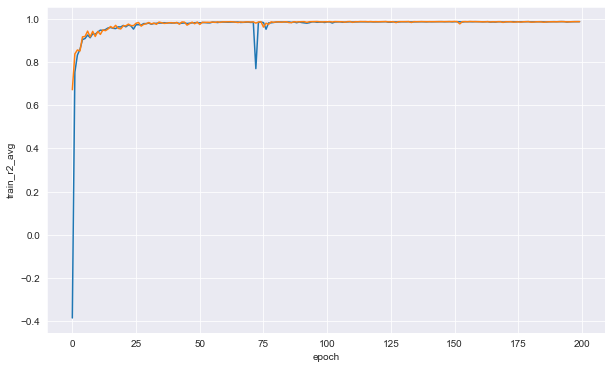

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd, fig_size=(10, 6), output_path=".\\imgs\\GasGiants_MDN20240116_TrainValR2_2.png", dpi=300)

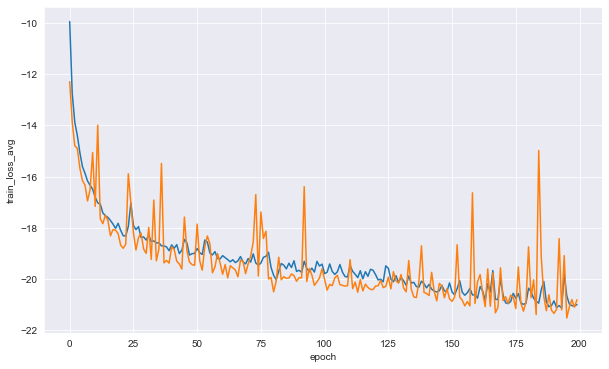

In [9]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(200)
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd, output_path=".\\imgs\\GasGiants_MDN20240116_TrainValLoss_2.png")

In [10]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())
loss_dis_df = pd.DataFrame(np.array(t_l) - np.array(v_l)).iloc[20:, :]
max_dis_10 = loss_dis_df.sort_values(by=0, ascending=False).iloc[:10, :].sort_index()

In [11]:
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\test_x.npy', t_x)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\test_y.npy', t_y)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\scaler_x.npy', m_x)
np.save('D:\\Resource\\MDN\\TestData\\GasGiantExo\\scaler_y.npy', m_y)
joblib.dump(m_x, "D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_v3_Xscaler_20231201.save")
joblib.dump(m_y, "D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_v3_yscaler_20231201.save")

['D:\\Resource\\MDN\\TestData\\GasGiantExo\\MDN_v3_yscaler_20231201.save']

In [14]:
model.eval()
# Predict
pi, mu, sigma = model(t_x.to('cuda'))
mix = Mixture()
criterion = NLLLoss()
mse = nn.MSELoss()
sample = mix(pi, mu, sigma).sample()
t_y = t_y.to('cuda')
print("NLLLoss: {}, MSE: {}, R2: {}".format(criterion(pi, mu, sigma, t_y),
                                            mse(t_y, sample),
                                            r2_score(sample, t_y)))

NLLLoss: -20.814352016099047, MSE: 0.000515228870824784, R2: 0.986296535711167


In [18]:
pi_exp = torch.exp(pi)
mu_np = mu.detach().cpu().numpy()
sigma_np = sigma.detach().cpu().numpy()
pi_np = pi_exp.detach().cpu().numpy()

y_label = np.arange(0, 1, 0.001).reshape(-1, 1)
y_label_ = y_label[:, np.newaxis, np.newaxis, :]
idx_select = np.random.choice(range(0, len(mu_np)), 20000)
mu_sub = mu_np[idx_select]
sigma_sub = sigma_np[idx_select]
pi_sub = pi_np[idx_select]
mu_sub_T = np.transpose(mu_sub, (0, 2, 1))
sigma_sub_T = np.transpose(sigma_sub, (0, 2, 1))

# Example: shape(1000, 6, 100, 10) 1000 data, 6 type, 100 rows with 10 columns every type
exponent = np.exp(
    -1 / 2 * np.square(np.transpose((y_label_ - mu_sub_T), (1, 2, 0, 3)) / sigma_sub_T[:, :, np.newaxis, :]))
factors = 1 / math.sqrt(2 * math.pi) / sigma_sub_T[:, :, np.newaxis, :]
GMM_PDF = np.sum(pi_sub[:, np.newaxis, np.newaxis, :] * factors * exponent, axis=-1)
MM = MinMaxScaler()
GMM_PDF = GMM_PDF.reshape(GMM_PDF.shape[0] * GMM_PDF.shape[1], GMM_PDF.shape[-1]).transpose((-1, 0))
# f = e.transpose((-1, 0))
GMM_PDF_scaled = MM.fit_transform(GMM_PDF)
# t_y = t_y.detach().cpu().numpy()



In [19]:
test_y_inverse = m_y.inverse_transform(t_y.detach().cpu().numpy())
test_y_inverse_sub = test_y_inverse[idx_select]

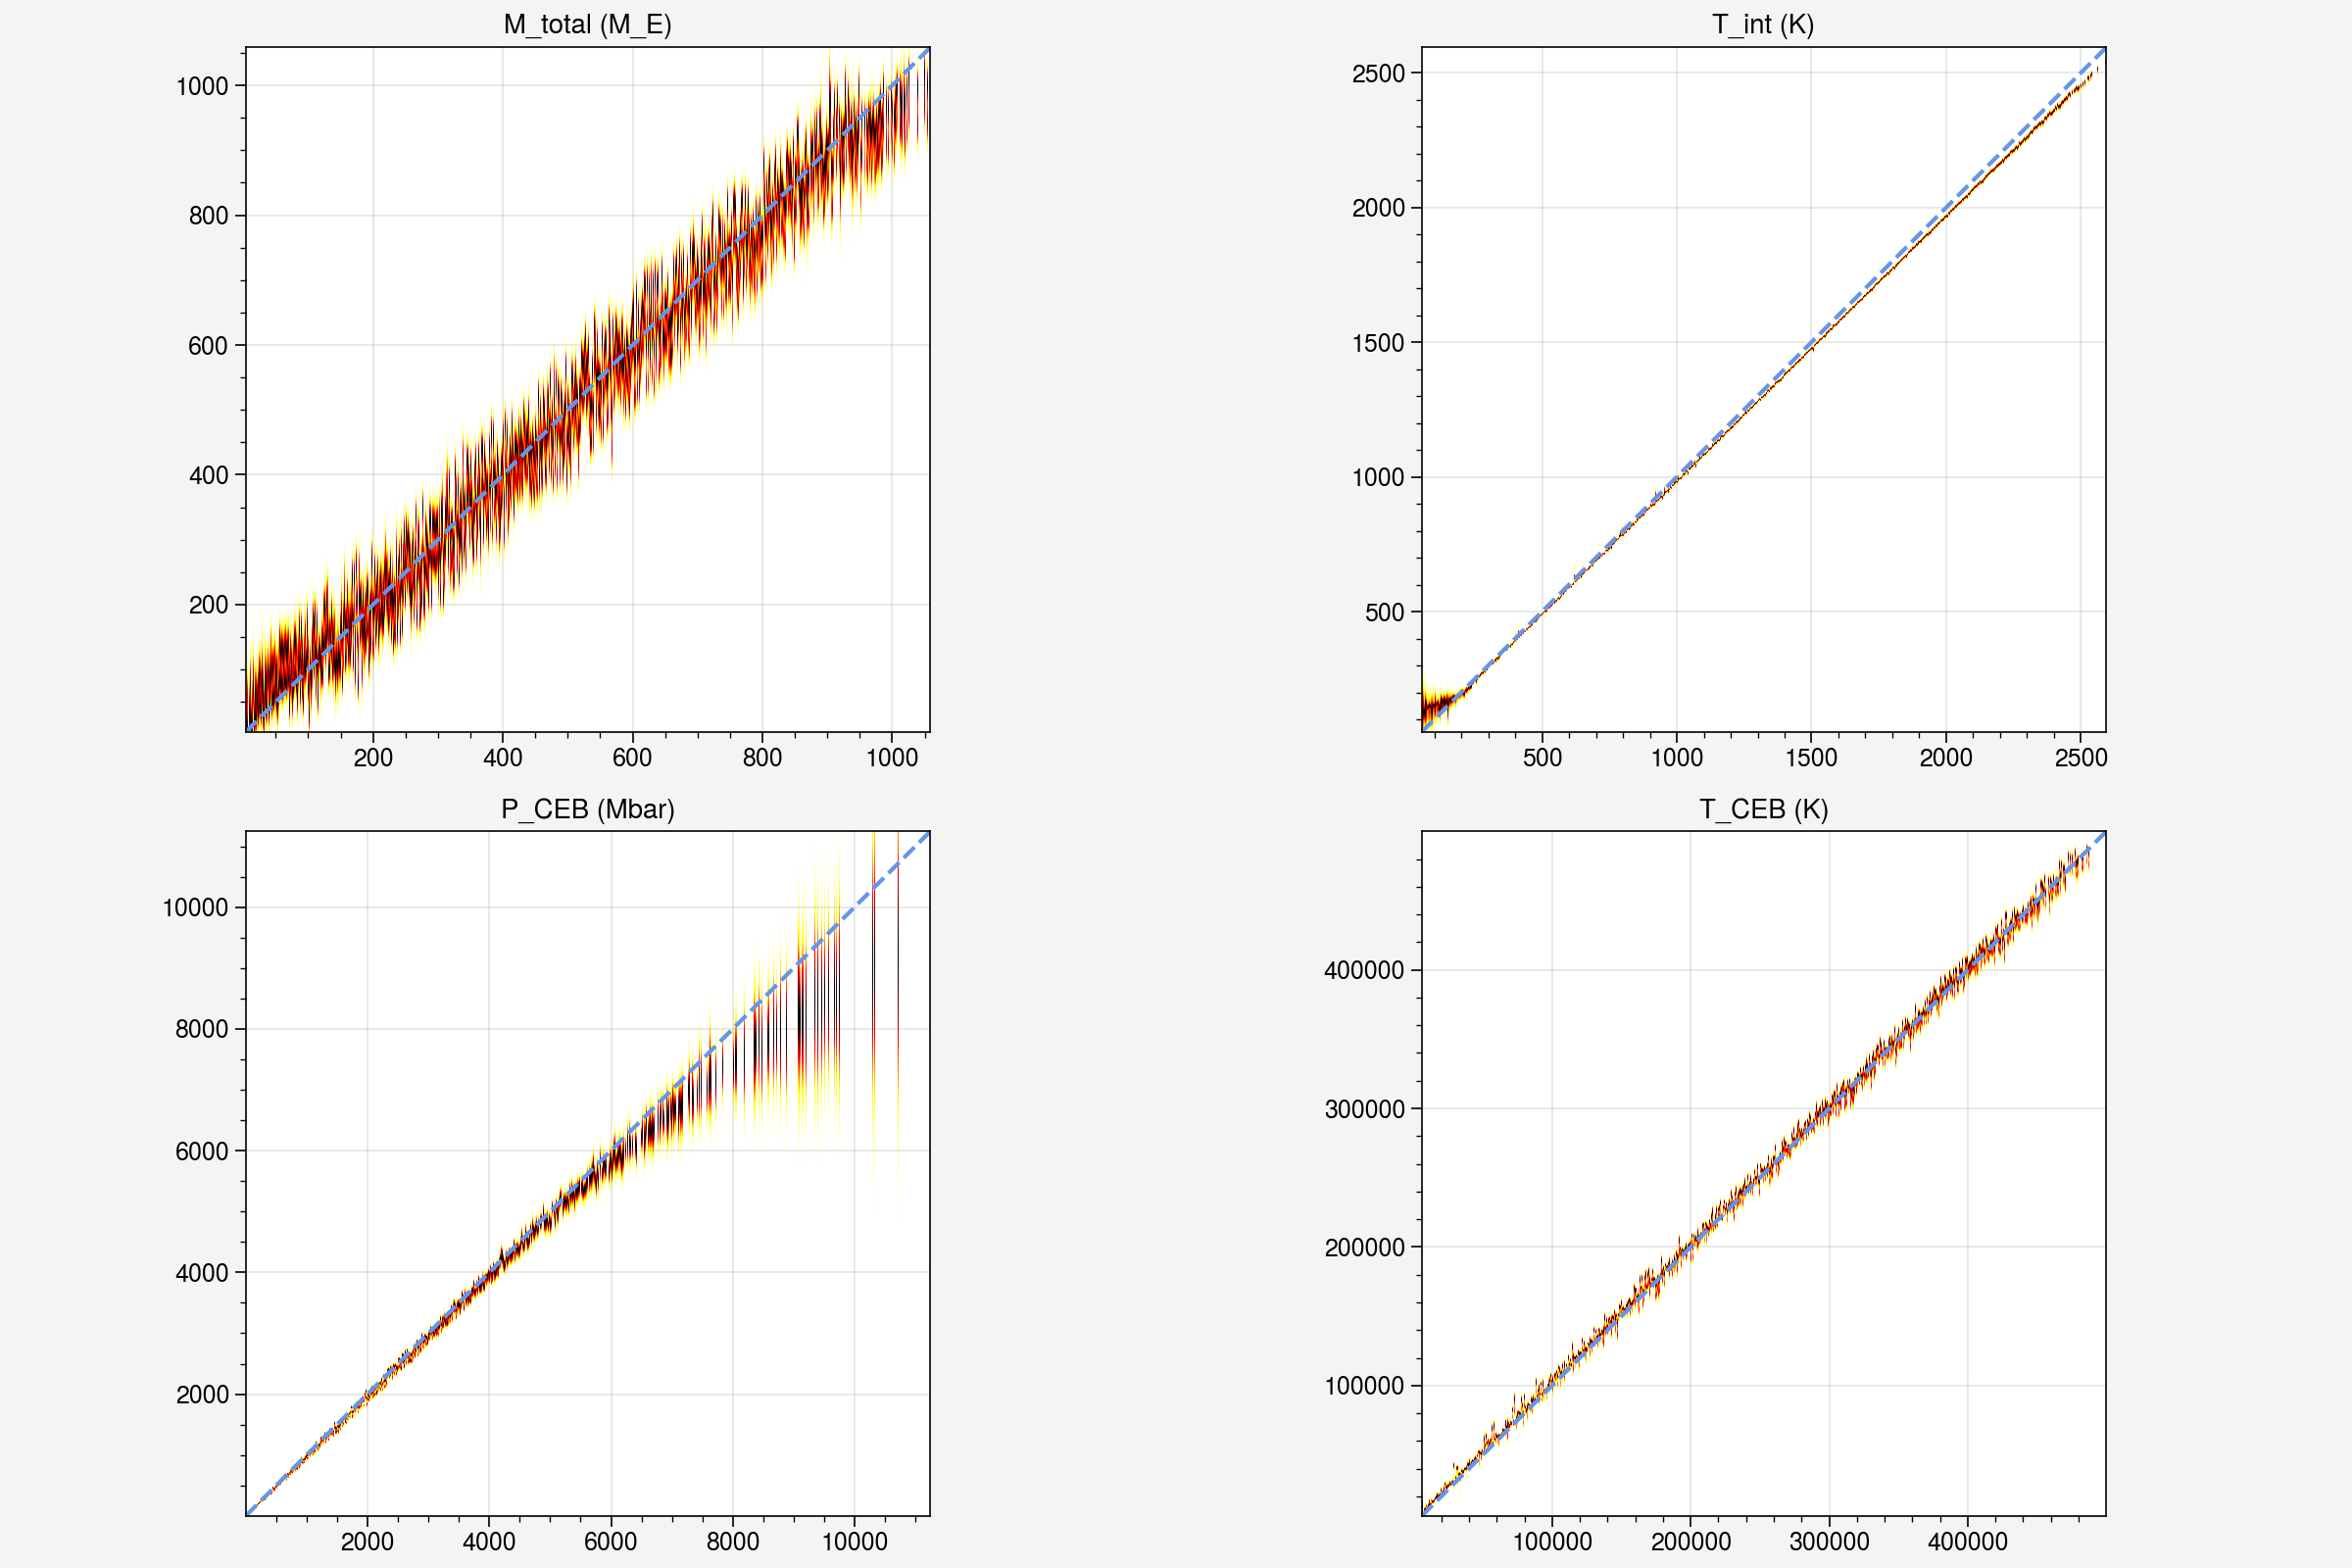

In [21]:
cmap = plt.cm.hot_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
fig, axs = pplt.subplots(
#     figsize=(4,4),
    nrows=2, ncols=2,
    share=False, 
    figsize=(12, 8)
#     tight=True,
)

input_parameters = [
    'Mass (M_J)',
    'Radius (R_E)',
    'T_sur (K)',
]

output_parameters = [
    'M_total (M_E)',
    'T_int (K)',
    'P_CEB (Mbar)',
    'T_CEB (K)'
]

xlocators = [
    200, 500, 2000, 100000
]
xminorlocators = [
    0.004, 0.02, 0.02, 0.02, 40, 100, 0.04, 0.004
]

OUTPUT_DIMS = len(output_parameters)

for o in range(OUTPUT_DIMS):
    y_max = max(test_y_inverse_sub[:, o])
    y_min = min(test_y_inverse_sub[:, o])
    for i in range(0, GMM_PDF_scaled.shape[-1], OUTPUT_DIMS):
        tx, ty = [test_y_inverse_sub[int(i / OUTPUT_DIMS), o], y_min]
        axs[o].imshow(
                GMM_PDF_scaled[:, o + i].reshape(-1, 1),
                cmap=cmap,
                norm=norm,
                origin='lower',
                extent=(tx, tx + 0.0001, ty, y_max)
            )

    axs[o].plot([y_min, y_max], [y_min, y_max], c='cornflowerblue', ls='--')
    axs[o].format(
        xlim=(y_min, y_max), ylim=(y_min, y_max), title=output_parameters[o], 
        # xlabel=output_parameters[o], 
        xlocator=xlocators[o]
        # ylocator=xlocators[o], yminorlocator=xminorlocators[o]
    )

In [22]:
fig.save('D:\\PythonProject\\RebuildProject\\Rock\\imgs\\prediction_GasGiantExoplanet_20240117.png')

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
sns.set_style('white')

In [35]:
def plot_line_2(y_1: str, y_2: str, df: pd.DataFrame, output_path: str, fig_size: tuple = (10, 6), dpi: int = 300):
    """
    Plot Merge Line (2 Lines) using Seaborn
    :param y_1: Name of Line 1
    :param y_2: Name of Line 2
    :param df: Dataframe
    :param fig_size:
    :param output_path:
    :param dpi:
    :return: Show Line picture and save to the specific location
    """
    fig = plt.figure(figsize=fig_size)
    sns.lineplot(x='epoch', y=y_1, data=df)
    sns.lineplot(x='epoch', y=y_2, data=df)
    plt.show()
    fig.savefig(output_path, dpi=dpi)


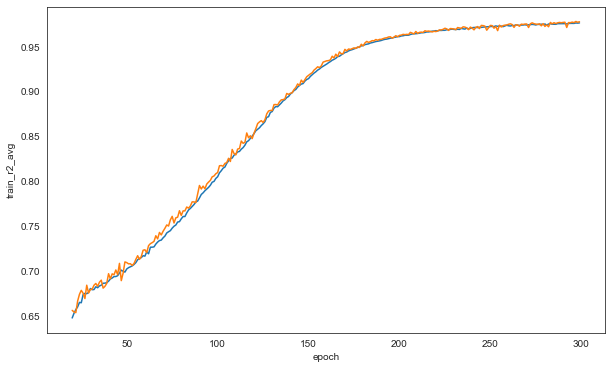

In [33]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['train_r2_avg'] = train_r2
result_pd['val_r2_avg'] = val_r2

plot_line_2(y_1='train_r2_avg', y_2='val_r2_avg', df=result_pd.iloc[20:, :], fig_size=(10, 6), output_path=".\\imgs\\GasGiants_MDN20231118_TrainValR2.png", dpi=300)

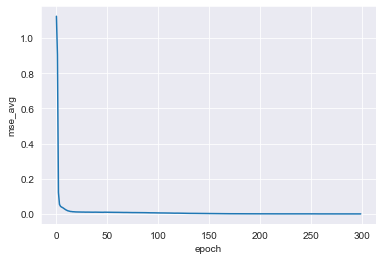

In [8]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['mse_avg'] = mse
sns.lineplot(x='epoch', y='mse_avg', data=result_pd)
plt.show()

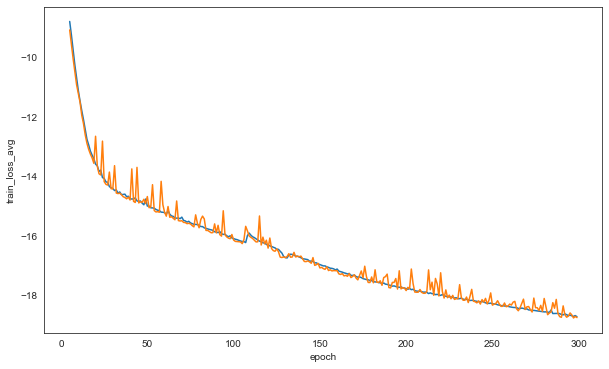

In [36]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(300)
result_pd['train_loss_avg'] = t_l
result_pd['validation_loss_avg'] = v_l

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd.iloc[5:, :], output_path=".\\imgs\\GasGiants_MDN20231118_TrainValLoss.png")

In [9]:
r2_distance = np.abs((np.array(train_r2) - np.array(val_r2)).mean())
loss_distance = np.abs((np.array(t_l) - np.array(v_l)).mean())
# loss_distance = np.abs(t_l[-1] - v_l[-1])

In [39]:
test_x_np = test_x.numpy()
test_y_np = test_y.numpy()

In [40]:
np.save('D:\\Resource\\MDN\\TestData\\test_x.npy', test_x_np)
np.save('D:\\Resource\\MDN\\TestData\\test_y.npy', test_y_np)
np.save('D:\\Resource\\MDN\\TestData\\scaler_x.npy', s_x)
np.save('D:\\Resource\\MDN\\TestData\\scaler_y.npy', s_y)